In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np

### Step 1: Import the data

In [2]:
animals_df = pd.read_csv('data/2021-11-ml-09-k-means-animals-dataset.csv')

### Step 2: Follow the steps in the lesson to prepare the data set for K-means clustering.
> Checking for nulls

In [3]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


**Found that comments is mostly nulls.**

In [4]:
animals_df.drop(columns = ['Comments'], inplace = True)

**Dropping all other nulls for simplicity.**

In [5]:
animals_df.dropna(inplace = True)

**Checking the dataframe for completion.**

In [6]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 1 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               330 non-null    object 
 1   Stage                330 non-null    object 
 2   Individual ID        330 non-null    object 
 3   Culmen Length (mm)   330 non-null    float64
 4   Culmen Depth (mm)    330 non-null    float64
 5   Flipper Length (mm)  330 non-null    float64
 6   Body Mass (g)        330 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    330 non-null    float64
dtypes: float64(6), object(3)
memory usage: 25.8+ KB


**Drop all non-numeric columns.**

In [7]:
numeric_animals = animals_df.select_dtypes(include = 'number')
numeric_animals.head(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302


**Standardize numeric columns (Realign the data so that "0" is the new average for each feature (column)).**
> Needed Library:
>> from sklearn import preprocessing

In [8]:
standardize = preprocessing.scale(numeric_animals)

# Convert standardized array to dataframe.
standardized = pd.DataFrame(standardize)

# Rename columns so that they are meaningful.
standardized.columns = numeric_animals.columns

### Step 3: Create a model for each value of K from K=2 through K=5.
> In this next step I created models for K=2 through K=9 inclusive because step 4 wanted K=6 thru K=9.<br>
I added all the models to a dictionary and added the cluster results back to the main dataframe.

In [9]:
X = standardized

def get_clusters(k):
    
    # Instantiate the KMeans model
    kmeans = KMeans(n_clusters = k, random_state = 0)
    
    # Fit the data to the model
    labels = kmeans.fit(X).labels_
    animals_df[f'cluster_{k}'] = labels
    return animals_df, kmeans

models = {}
for item in range(2,10):
    animals_df, model = get_clusters(item)
    models[item] = model

animals_df.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,0,0,0,4,2,3,6,5
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,0,0,0,3,4,0,2,8
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0,0,0,4,2,3,6,6
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,0,0,0,4,0,4,5,3
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,0,0,0,4,2,3,6,6


### Step 4: (I mixed the steps up a little bit because it made more sense, so here I am creating all the scatterplots.)

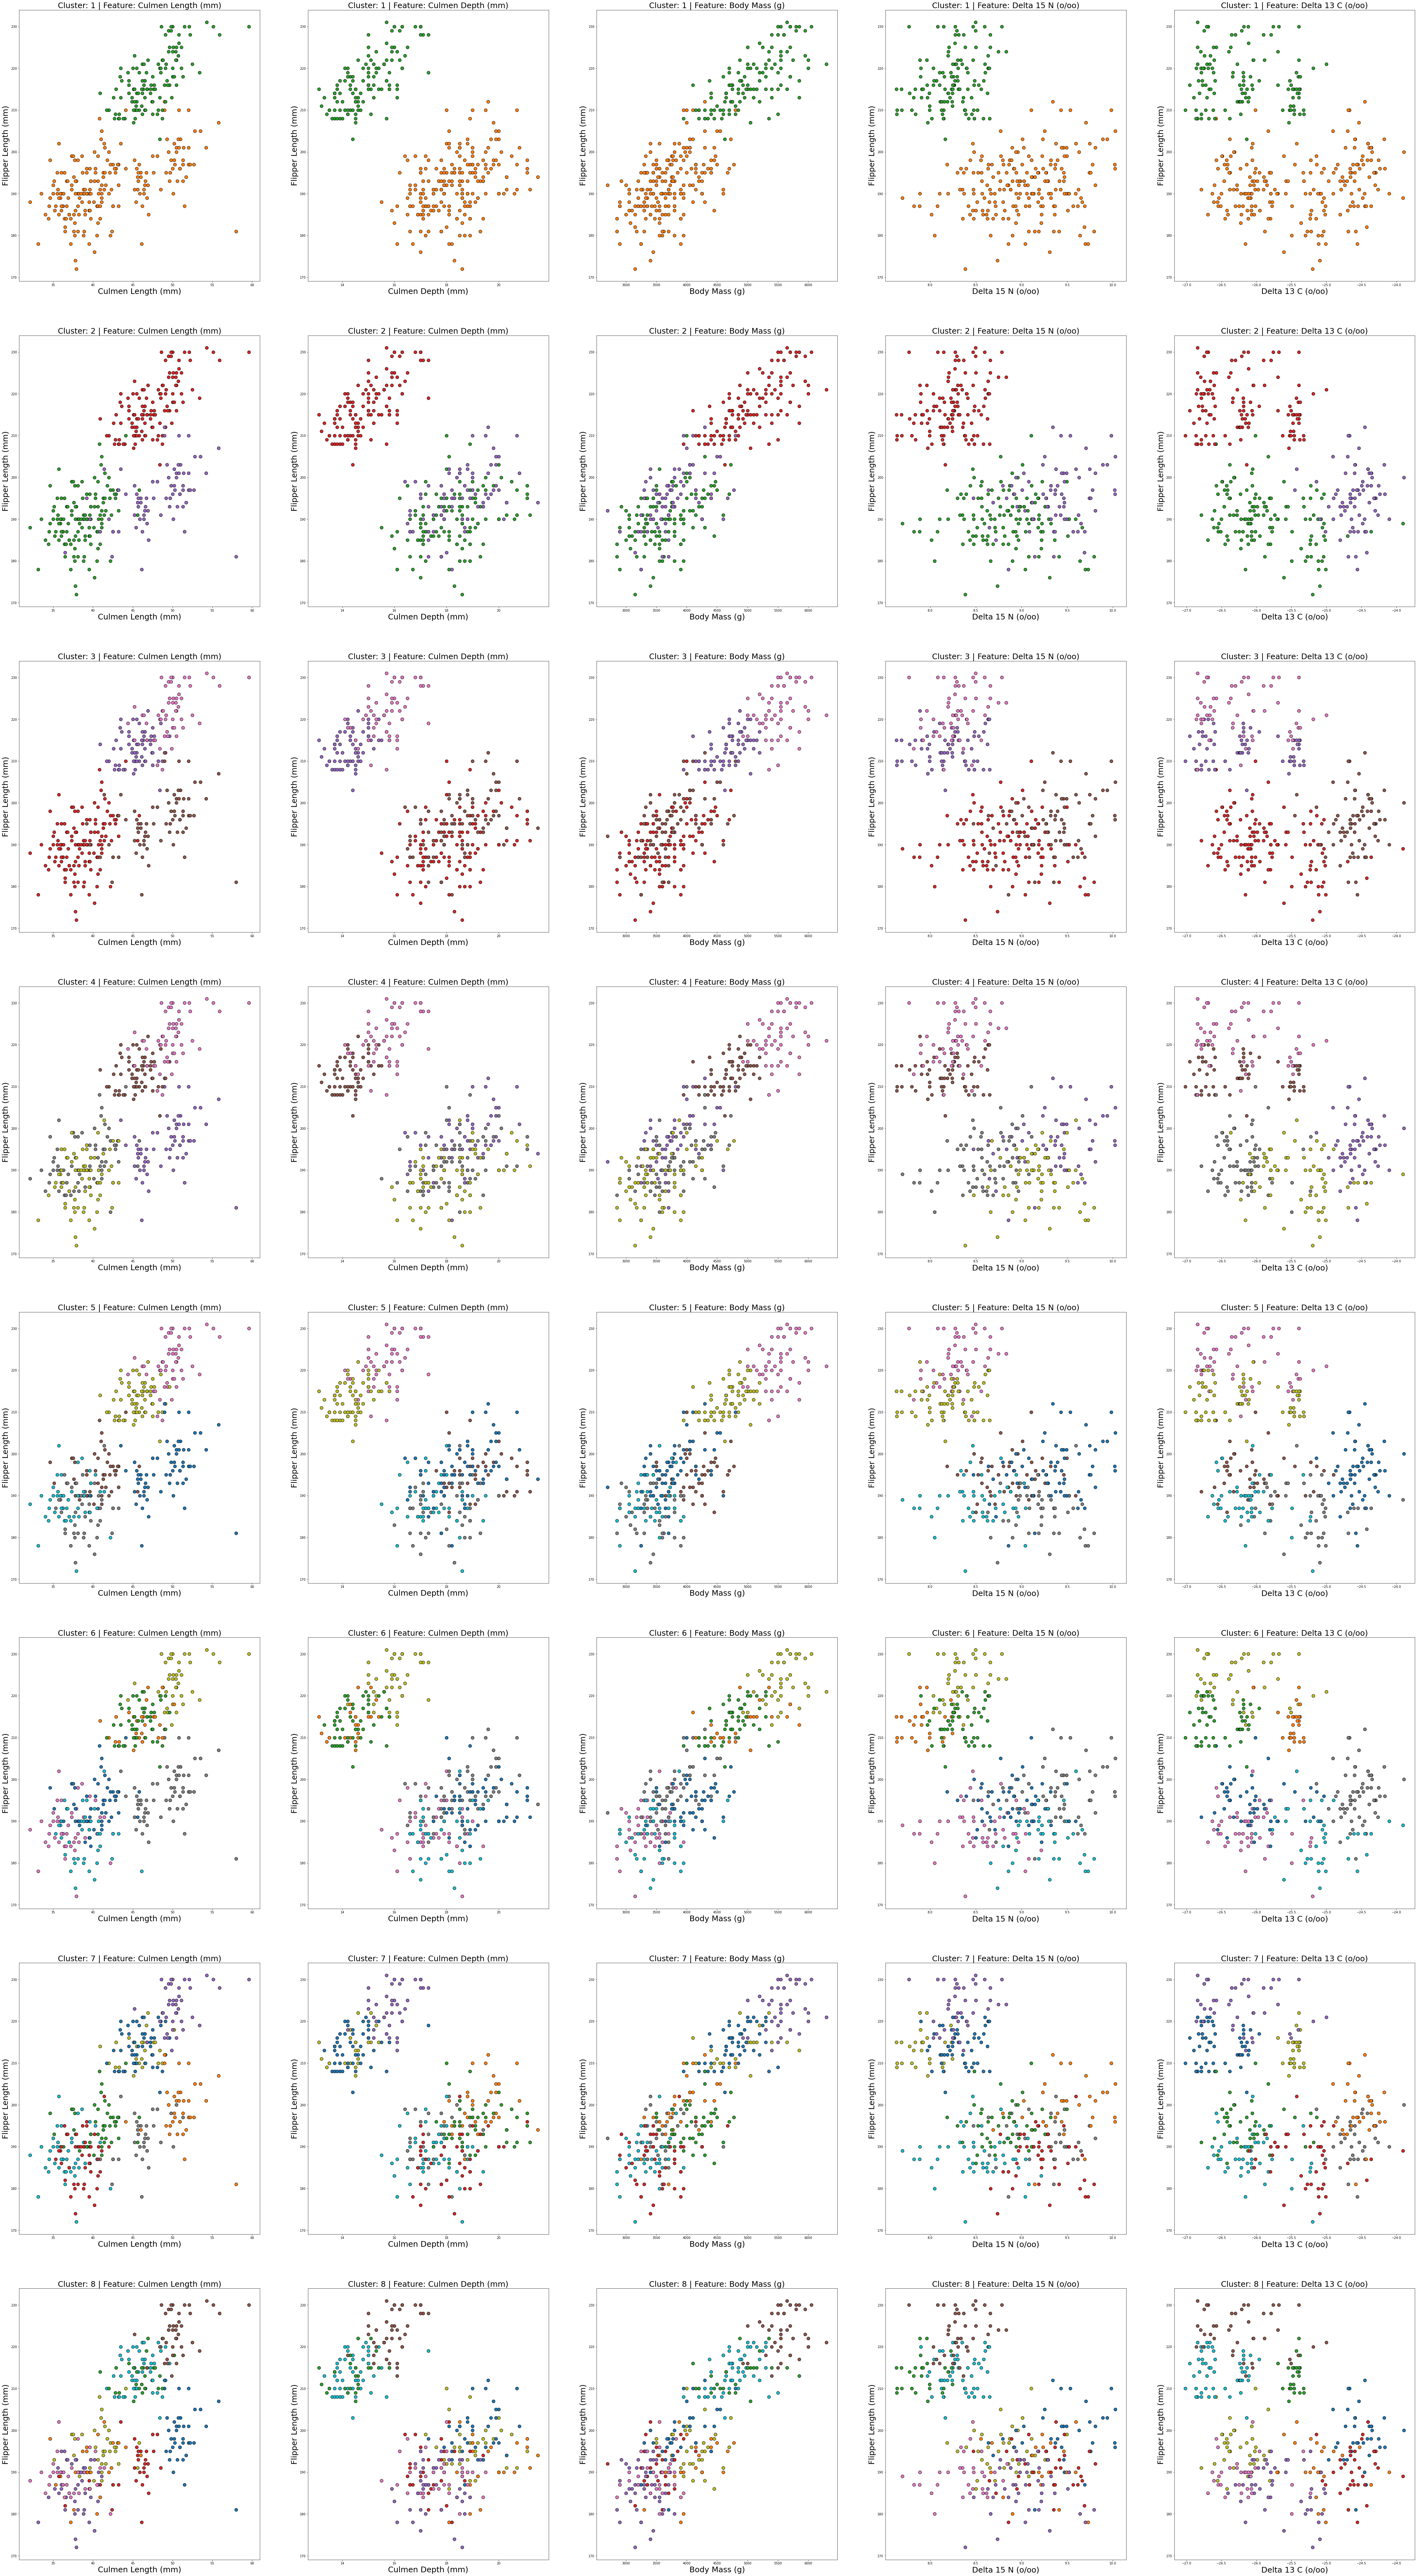

In [10]:
def graph_clusters(animals_df):
    plt.rcParams['axes.labelsize'] = 25
    fig, axs = plt.subplots(len(animals_df.columns[9:]),5, figsize = (80,150))
    colors = sns.color_palette("tab10") * 5
    
    # Establishing which feature I will be comparing all the others to.
    main_y = 'Flipper Length (mm)'
    
    # List of all other features.
    data_features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

    # For every K that was modeled (K=2,3,4,5...)
    for i, k_group in enumerate(animals_df.columns[9:]):
        
        # For every feature in the list of features
        for var_i, feature in enumerate(data_features):

            # For every cluster in the K.
            for color_i, cluster in enumerate(sorted(animals_df[k_group].unique())):
                picked_color = colors[i + color_i + 1]
                subset = animals_df[(animals_df[k_group] == cluster)]
                
                sns.scatterplot(
                     data = subset,
                     x = subset[feature],
                     y = subset[main_y],
                     color = picked_color,
                     s = 100,
                     alpha = 1, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False,
                     ax = axs[i][var_i]
                )
            axs[i][var_i].set_title(f'Cluster: {cluster} | Feature: {feature}', fontsize = 25)
                
graph_clusters(animals_df)

#### Build Scree Plot

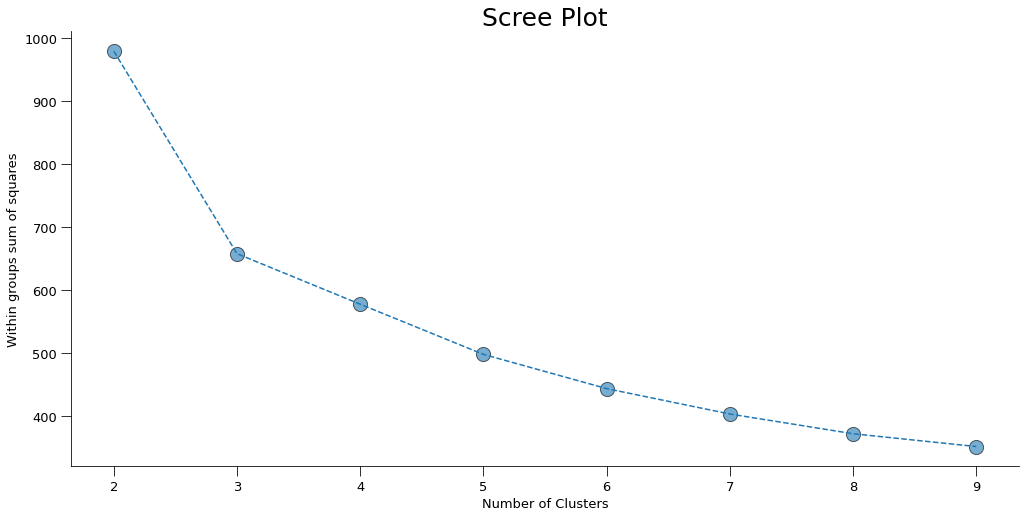

In [11]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

# Create Figure
fig = plt.figure(figsize = (17,8))

plt.title('Scree Plot', fontsize = 25)

scree_data = {'number_of_clusters': [], 'within_groups_sse': []}
for model in models.keys():
    scree_data['within_groups_sse'].append(models[model].inertia_)
    scree_data['number_of_clusters'].append(model)

# Create Scatter Plot
ax = sns.scatterplot(x = scree_data['number_of_clusters'], y = scree_data['within_groups_sse'],
                       s = 200,
                       alpha = .6, 
                       edgecolor = 'black', 
                       linewidth = 1,
                       legend = False,
                    )

# Connect the Dots
plt.plot(scree_data['number_of_clusters'],scree_data['within_groups_sse'], linestyle = 'dashed')

ax.set_ylabel("Within groups sum of squares", fontsize = 13)
ax.set_xlabel("Number of Clusters", fontsize = 13)
ax.tick_params(size = 10)
sns.despine()